# HW2

## Question #1

For this question, we are going to use a data set of [the top grossing movies between 2007 and 2011](https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv).

1. Ingest the data as a pandas data frame.

2. Inspect the data and explain what it contains.

3. Count how many top grossing movies each studio made between 2007 and 2011, and visualize it as a bar chart.

4. Convert your bar chart above into a pie chart.

5. Make a cross-tabulation of Genres against the Year, and observe that the data contains errors. Correct the errors using 'replace' method then cross-tabulate again.

6. Draw a 'heat-map' of the corrected cross-tabulation you got above.

# Solution 1.1
`pandas` was imported to do dataframe work,\
`urlopen` was imported to pull data from a url,\
`plt` was imported to plot the data as both a bar chart and a pie chart,\
`seaborn` was imported to later project specific parts of data as a Heat Map.

In [1]:
from urllib.request import urlopen
import pandas as ps
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = "https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv"
with urlopen(url) as f:
    data = ps.read_csv(url, encoding = "utf-8")
data = ps.DataFrame(data)
data = data.sort_values(by = "Year", ignore_index = True)
data

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,License to Wed,Comedy,Warner Bros.,55,1.980206,8,$69.31,2007
1,P.S. I Love You,Romance,Independent,82,5.103117,21,$153.09,2007
2,Music and Lyrics,Romance,Warner Bros.,70,3.647411,63,$145.90,2007
3,The Heartbreak Kid,Comedy,Paramount,41,2.129444,30,$127.77,2007
4,Knocked Up,Comedy,Universal,83,6.636402,91,$219,2007
...,...,...,...,...,...,...,...,...
72,Midnight in Paris,Romence,Sony,84,8.744706,93,$148.66,2011
73,Monte Carlo,Romance,20th Century Fox,50,1.983200,38,$39.66,2011
74,My Week with Marilyn,Drama,The Weinstein Company,84,0.825800,83,$8.26,2011
75,Gnomeo and Juliet,Animation,Disney,52,5.387972,56,$193.97,2011


# Solution 1.2
Data contains top grossing movies from years 2007 to 2011 with movies' lead studio, genre, audience score, profitability, Rotten Tomatoes score and their worldwide revenue.

# Solution 1.3
A dictionary, `an_count`, is created first that has Lead Studio names as its keys and the number of movies that each studio made between 2007-2011 as its values. A comprehension is used to find each studio's movie count. Then a bar chart, `figr`, with `matplotlib.pyplot`s `bar` function is created that displays each studio's movie count. Then the figure is formatted in the last three lines.

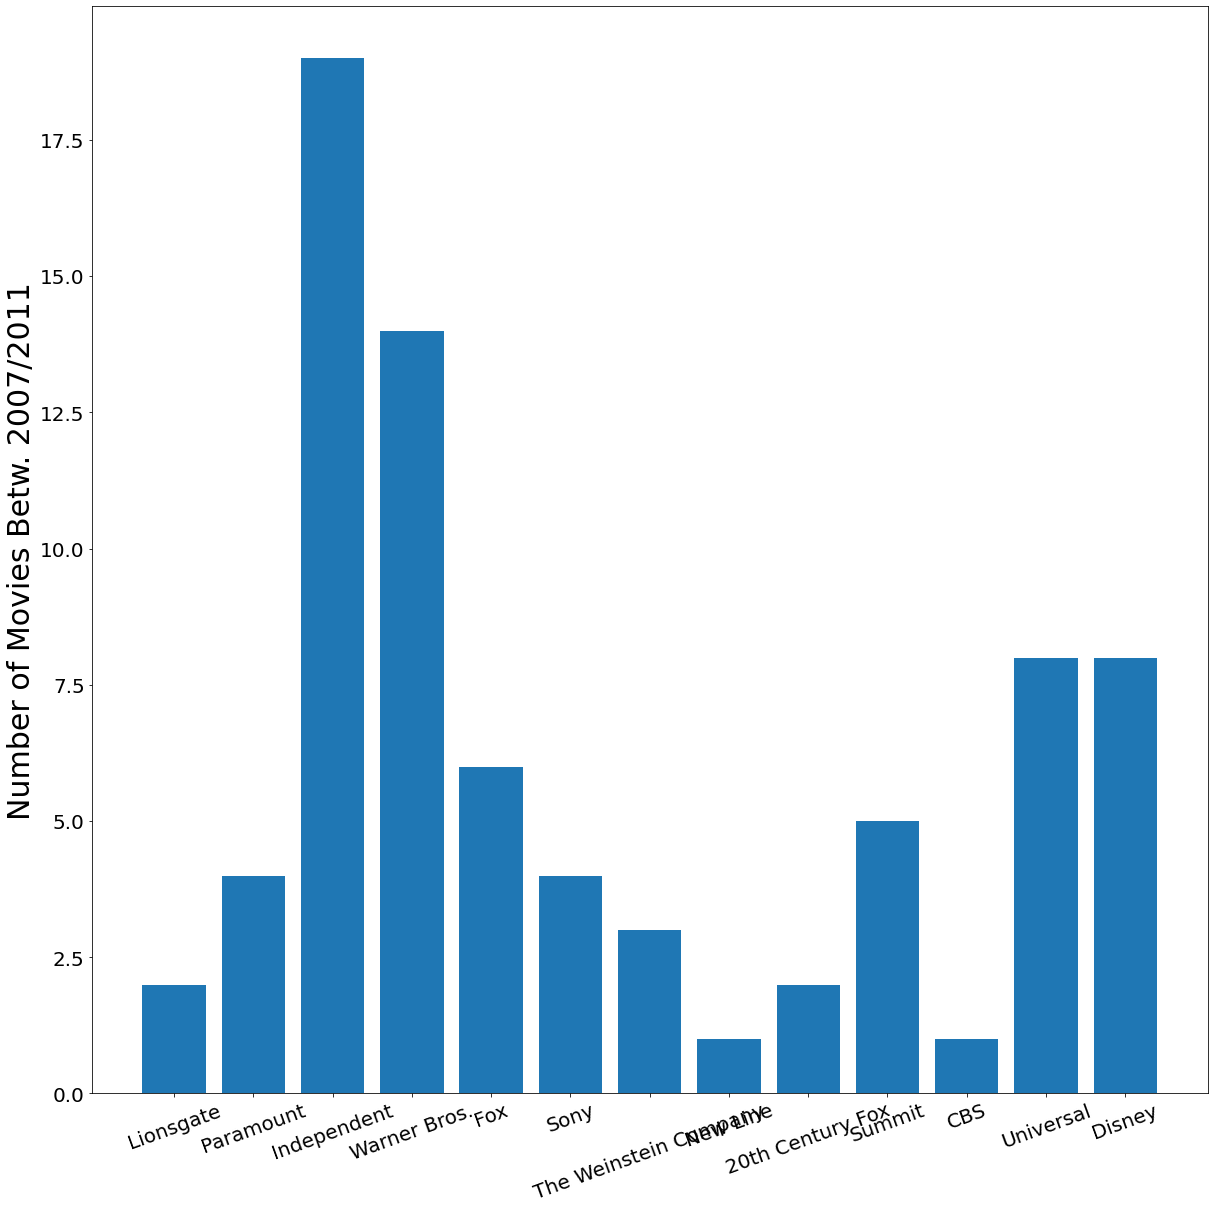

In [3]:
an_count = {},
an_count = {i:len(data[(data["Lead Studio"] ==i)]) for i in set(data["Lead Studio"])}
studios = list(an_count.keys()); tops = list(an_count.values());
plt.figure(figsize=(20, 20))
figr = plt.bar(range(len(an_count)), tops, tick_label = studios)
plt.ylabel("Number of Movies Betw. 2007/2011",fontsize=30);
plt.yticks( fontsize=20);
plt.xticks(rotation=20, fontsize=20);

# Solution 1.4
Same data that was used to create the bar chart above is again used to create a pie chart with `matplotlib.pyplot`s `pie` function.

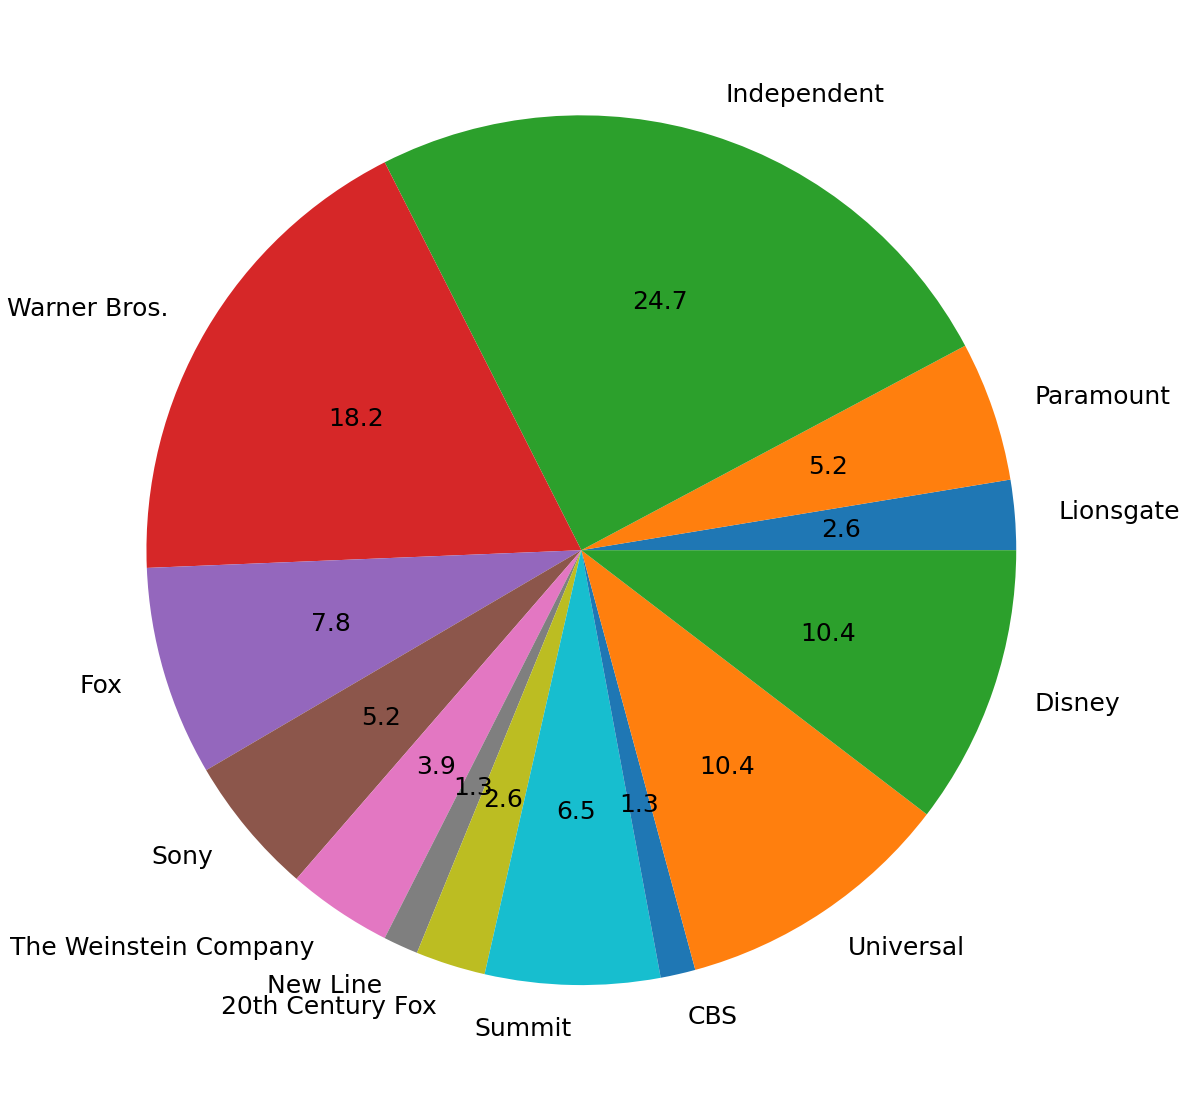

In [4]:
plt.figure(figsize=(20, 20));
plt.pie(tops, labels = studios, autopct ="%1.1f",  textprops={"fontsize":25});
plt.yticks(fontsize=20);
plt.xticks(rotation=20, fontsize=20);

# Solution 1.5
`pandas.crosstab` function is used to create a crosstabulation of Movie Genres against Movie Years.

In [5]:
ct = ps.crosstab(data["Genre"], data["Year"])
ct

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comdy,0,1,0,0,0
Comedy,6,12,6,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,4,2,0,0,7
Romence,0,0,0,0,1
comedy,0,0,1,0,0


The crosstabulation above, however, has some spelling mistakes. For example the data in the row "Comdy" is meant to be in the row "Comedy". These mistakes are corrected in the below cell with the built-in `replace` function.

In [6]:
%%capture
for i in range(len(data["Genre"])):
    data["Genre"][i] = data["Genre"][i].replace("Comdy", "Comedy")
    data["Genre"][i] = data["Genre"][i].replace("comedy", "Comedy")
    data["Genre"][i] = data["Genre"][i].replace("Romence", "Romance")
    data["Genre"][i] = data["Genre"][i].replace("romance", "Romance")

In [7]:
ct = ps.crosstab(data["Genre"], data["Year"])
ct

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comedy,6,13,7,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,5,2,0,0,8


# Solution 1.6
`seaborn.heatmap` function was used to transform the crosstabulation above to a heat map.

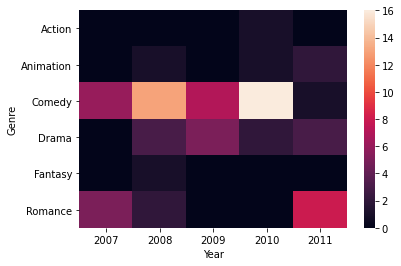

In [8]:
hmap = sns.heatmap(ct)

## Question #2

For this question, we are going to use the [Open Flight Data](https://openflights.org/data.html#route).

1. Find the link for the data from the link I gave above. Ingest it as a pandas data frame.

2. Inspect it and explain what it contains.

3. Construct a data frame that contains 3 columns: source airport, target airport and the number of flights from source to target.

4. Filter the data frame and select only the routes that has 10 or more flights between them.

5. Construct a network using the `networkx` library that I used in our last lecture using the data frame you constructed in the previous step.

6. Visualize the network.

# Solution 2.1
Additional to the libraries used in the solution above;\
`networkx` was imported to create a network between data points. `.dat` file is opened py `pandas.read_csv` and is then converted to a dataframe. Since the raw data does not contain any column names, the data has the first row's entries as its column names. These column names were replaced with proper column names to increase readability(the first row's information is deleted by this process and I let that slip this time since I did not want to waste a massive processing power to get 1 row of data out of ~67000). 


In [9]:
import networkx as nx
url = "https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"
with urlopen(url) as f:
    data2 = ps.read_csv(f)
    data2 = ps.DataFrame(data2)
data2 = ps.DataFrame({"Airline":data2["2B"],"Airline ID":data2["410"],
                           "Source Airport":data2["AER"],"SA ID":data2["2965"],
                           "Target Airport":data2["KZN"],"TA ID":data2["2990"], 
                           "Stops":data2["0"],"Equipment":data2["CR2"]})
data2

,Airline,Airline ID,Source Airport,SA ID,Target Airport,TA ID,Stops,Equipment
0,2B,410,ASF,2966,KZN,2990,0,CR2
1,2B,410,ASF,2966,MRV,2962,0,CR2
2,2B,410,CEK,2968,KZN,2990,0,CR2
3,2B,410,CEK,2968,OVB,4078,0,CR2
4,2B,410,DME,4029,KZN,2990,0,CR2
...,...,...,...,...,...,...,...,...
67657,ZL,4178,WYA,6334,ADL,3341,0,SF3
67658,ZM,19016,DME,4029,FRU,2912,0,734
67659,ZM,19016,FRU,2912,DME,4029,0,734
67660,ZM,19016,FRU,2912,OSS,2913,0,734


# Solution 2.2
The data contains flight infortmation of specific flights with the flight provider's name and its ID, the flight's source airport and target airport, alongside with IDs of these airports, the number of stops made in the flight and finally the equipment within the plane that has done the flight. 

# Solution 2.3
"Source Airport" and "Target Airport" of the above dataframe is transferred into a list, `flights`,  their indices intact. These lists are then fitted inside a new dataframe, `fldf`, which has two columns. To count the number of flights between distinct routes, we group `fldf` by (source airport, target airport) couples and a third row is created that contains the number of trips made in these distinct routes. Each group's size were measured to obtain the specific number of trips.

In [10]:
flights = list()
for i in range(len(data2)):
    flights.append((data2["Source Airport"][i],
                     data2["Target Airport"][i]))
fldf = ps.DataFrame(flights, columns =["Source A.", "Target A."])
fldf = ps.DataFrame({"# of flights":fldf.groupby(["Source A.", "Target A."]).size()}).reset_index()
fldf

,Source A.,Target A.,# of flights
0,AAE,ALG,1
1,AAE,CDG,1
2,AAE,IST,1
3,AAE,LYS,1
4,AAE,MRS,2
...,...,...,...
37589,ZYI,SZX,1
37590,ZYI,WUH,1
37591,ZYI,XIY,1
37592,ZYI,XMN,1


# Solution 2.4
A simple bracket comprehension, assigned to `df_new`, is used to choose routes based on their number of trips. The comprehension alone, however, does not manage rows very well and carries the row number in the above dataframe as a part of its elements. So, `df_new` is modified to have neutral indices without damaging any data.

In [11]:
df_new = fldf[fldf["# of flights"]>=10]
df_new = ps.DataFrame({"Source A." :df_new["Source A."].tolist(),
          "Target A." :df_new["Target A."].tolist(),
          "# of Flights" :df_new["# of flights"].tolist()})
df_new

,Source A.,Target A.,# of Flights
0,AKL,SYD,10
1,ATL,DEN,11
2,ATL,DFW,11
3,ATL,JFK,10
4,ATL,LAX,10
...,...,...,...
64,SIN,DPS,10
65,SIN,KUL,10
66,SYD,AKL,11
67,TPE,NRT,10


# Solution 2.5
The first two columns of the dataframe in the solution above is fed into the `networkx.from_pandas_edgelist` function, with the source nodes from "Source A." and target nodes from "Target A.", which yields a graph.

In [12]:
df_graph = nx.from_pandas_edgelist(df_new, source = "Source A.",target = "Target A.")

# Solution 2.6
The graph obtained in the solution above is then visualized with `networkx.draw_shell` function. `draw_shell` was specifically used for the graph to be easier on the eye and be more understandable. 

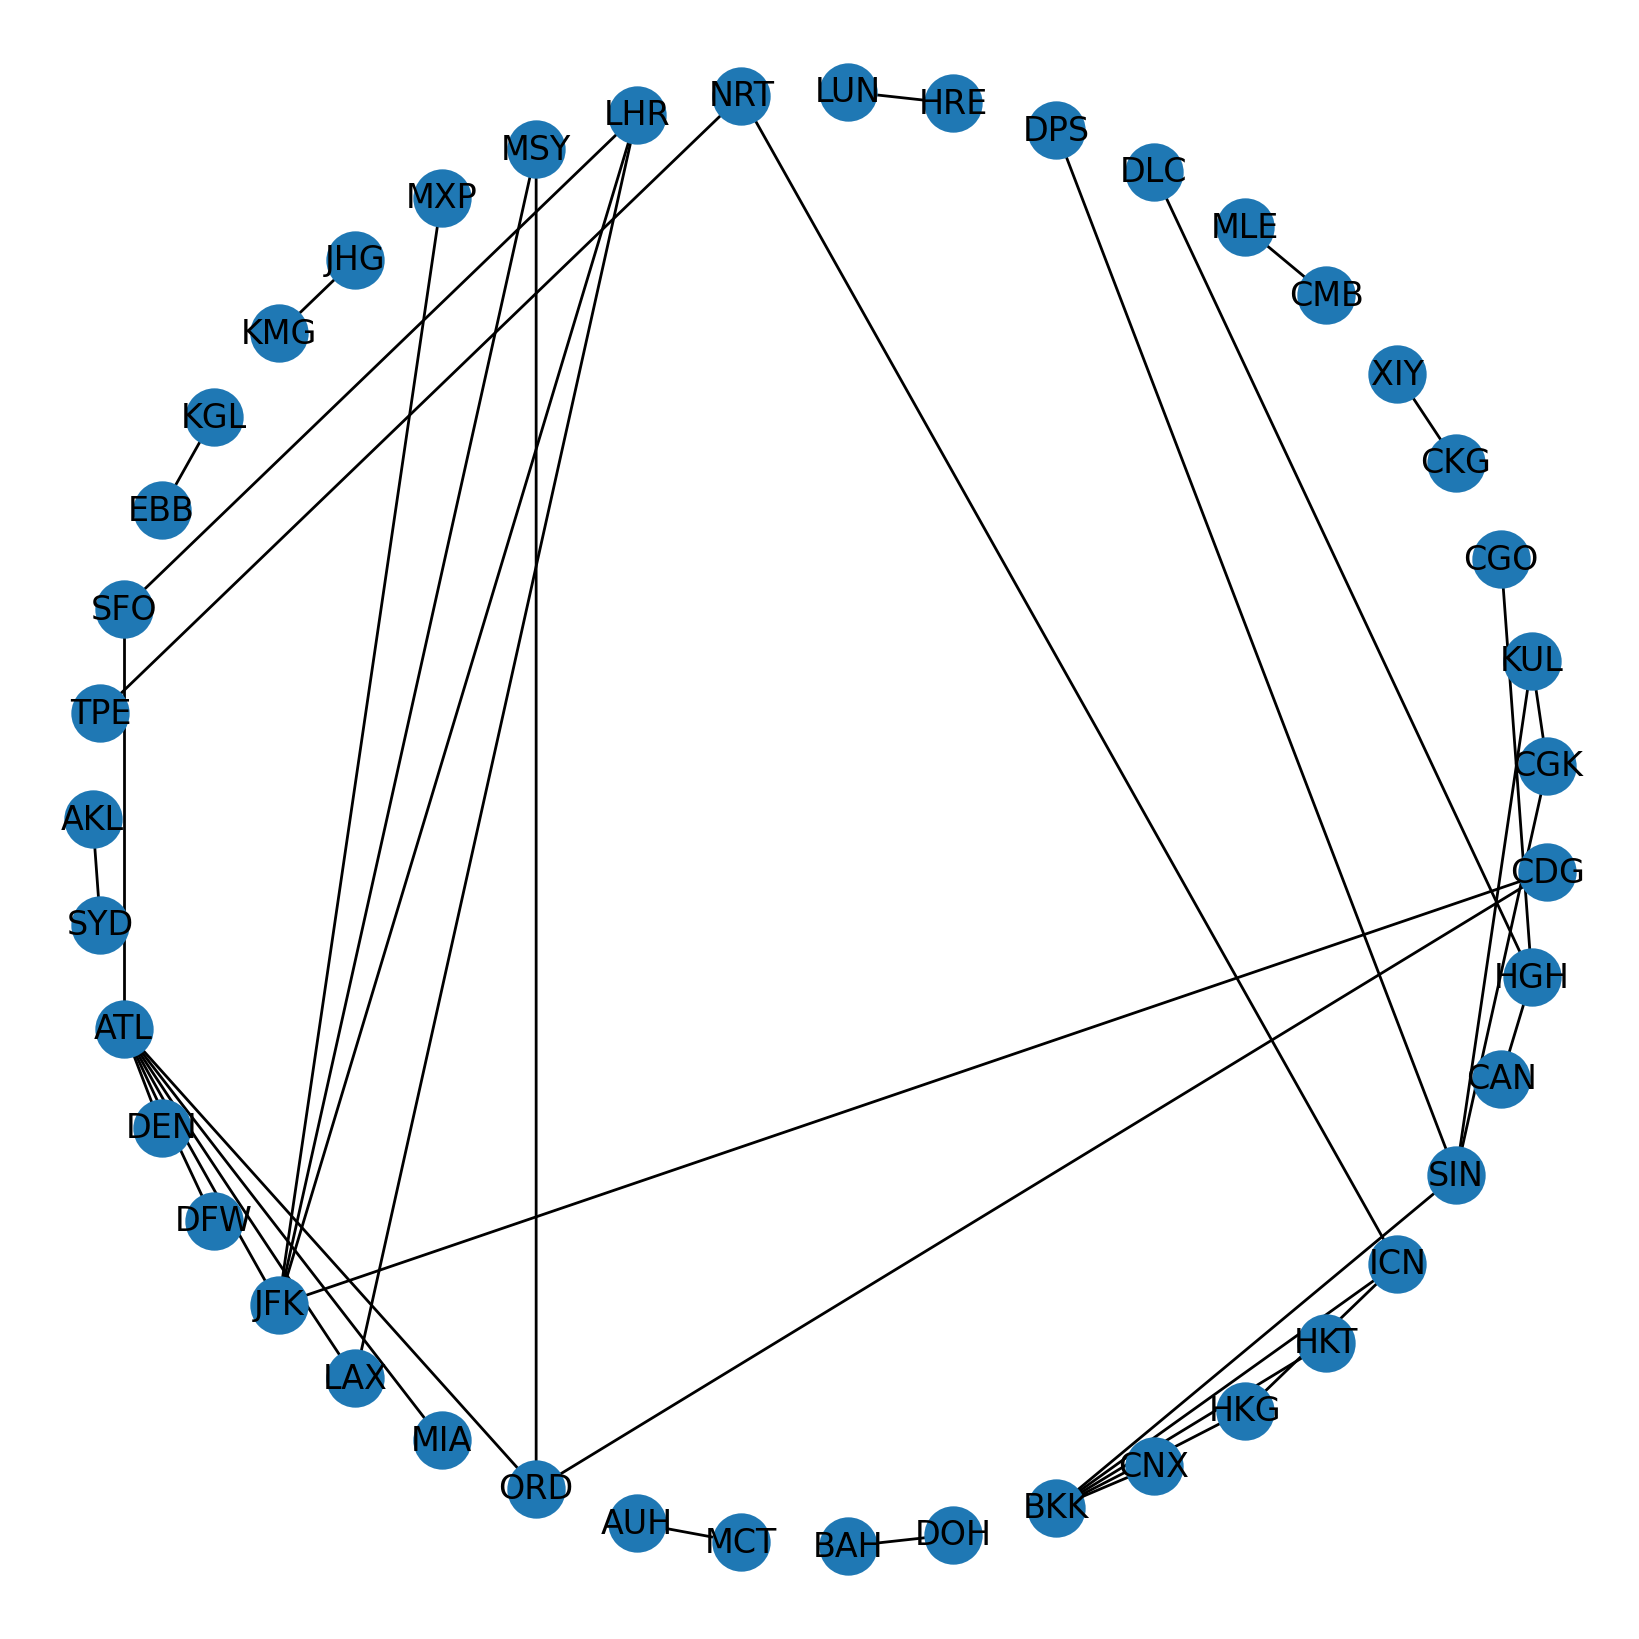

In [13]:
fig = plt.figure(1, figsize=(8, 8),  dpi =200)
nx.draw_shell(df_graph, with_labels = True, node_size=400)

## Question #3

For this question we are going to use the [NBA Data](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/) that I have shown you in our last lecture.

1. Ingest the 2019 data as a pandas data frame.

2. Inspect it and explain what it contains.

3. Write a function that takes two arguments: the NBA data frame and a 'game type' argument which can be 'regular' or 'playoff'. The function must return another pandas data frame of list of players, the number of asists, blocks and rebounds for each player. Evaluate your function on both regular games, and then on playoff games.

4. Write another function that takes two argumentas as before: the NBA data frame and the game type. The function must return the list of teams and the number of wins during the regular season or the play offs as a data frame. Visualize the returned data frame as a bar chart for both regular games, and then on playoff games.

# Solution 3.1
**WARNING!** The cell below, if run, downloads about ~118 mb of data. It may take a while for it to terminate.

In [14]:
url = "https://sports-statistics.com/database/basketball-data/nba/2019-20_pbp.csv"
with urlopen(url) as f3:
    data3 = ps.read_csv(f3)
data3 = ps.DataFrame(data3)
data3

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539260,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,29,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539261,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,20,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539262,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,15,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539263,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,0,LAL,End of 4th quarter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Solution 3.2 
The data contains various information about the NBA games that were played in he '19-'20 season:
* the https://www.basketball-reference.com/ url to the game, 
* the name of the arena where the game was played, 
* the date and time of the game,
* names of the opposing teams with "home" and "away" attached to the parties (and also the winner),
* all the significant moves that were made in the game (blocks, jumpballs, fouls etc.), respective to the player and the team that made the move, consecutively,
* how many points each team made in a game,
* type of the game (regular season game or play-off game).

# Solution 3.3
The first chunk of code in the function is a switch that is dependent on the `gametype` parameter. It checks first whether the given string is inside the boundaries (regular or play-off), then decides which part of the data will be processed in the next steps, then declares it as `dframe`.

The second chunk of code creates a set of player names by first filtering the necessary columns from `dframe` (rebounder, assister and blocker), then converts these columns to lists and then to sets. This way, we are able to obtain a set of all (needless to say, distinct players) the players that have made at least one move (blocked, assisted or rebounded at least once). 

An output dataframe, `out_df`, is created in the third chunk of code that will store each player's statistics and name. By browsing through the player names' set (`player_set`) and by using the original dataset's "*Rebounder*", "*Assister*" and "*Blocker*" columns, we obtain the statistics of each player and append it to the output dataframe, `out_df`. We then return the `out_df`.

In [15]:
def move_counter(dframe:ps.core.frame.DataFrame, gametype:str):
    if gametype != "playoff" and gametype!= "regular":
        return(display("Game type is incorrect."))
    else:dframe = ps.DataFrame(dframe.groupby("GameType"));
    if gametype == "playoff":
        dframe = dframe[1][0];
    elif gametype == "regular":
        dframe = dframe [1][1]
        
    player_list = list(dframe["Rebounder"].unique()) +list(dframe["Assister"].unique()) + list(dframe["Blocker"].unique())
    player_list = [x for x in player_list if str(x) != "nan" and str(x) != "Team"]
    player_set = list(set(player_list))
    
    colmn = ["Name", "Blocks", "Assists", "Rebounds"]
    out_df = ps.DataFrame(columns = colmn)

    for i in range(len(player_set)):
        dum = player_set[i]
        block_count = 0; reb_count = 0; ass_count = 0;
        block_count = (dframe["Blocker"].tolist()).count(dum);
        reb_count = (dframe["Rebounder"].tolist()).count(dum);
        ass_count = (dframe["Assister"].tolist()).count(dum);
        out_df = out_df.append({"Name":dum,
                       "Blocks":block_count, "Assists": ass_count, 
                                "Rebounds":reb_count}, ignore_index = True)
    return out_df

**STATS FOR REGULAR SEASON GAMES**

In [16]:
move_counter(data3, "regular")

,Name,Blocks,Assists,Rebounds
0,J. Layman - laymaja01,10,15,57
1,Q. Weatherspoon - weathqu01,1,11,7
2,A. Simons - simonan01,10,97,152
3,C. Johnson - johnsca02,20,69,187
4,K. Middleton - middlkh01,7,265,382
...,...,...,...,...
523,M. Shayok - shayoma01,1,1,7
524,A. Schofield - schofad01,4,15,47
525,N. Bjelica - bjeline01,40,203,458
526,J. Motley - motlejo01,0,8,10


**STATS FOR PLAY-OFF GAMES**

In [17]:
move_counter(data3, "playoff")

,Name,Blocks,Assists,Rebounds
0,B. Bol - bolbo01,2,0,5
1,E. Gordon - gordoer01,7,36,32
2,M. Oni - onimi01,1,0,4
3,D. Waiters - waitedi01,1,2,2
4,M. Brogdon - brogdma01,0,40,17
...,...,...,...,...
202,L. James - jamesle01,18,184,226
203,T. Cook - cookty01,0,0,2
204,R. Westbrook - westbru01,2,37,56
205,M. Smart - smartma01,8,78,89


# Solution 3.4
The first chunk of code of the function is same as the Solution 3.3's function.

In the second chunk, the "URL" column of the filtered data is used to group the data into distinct games, since that is the only column that depends only on the individual game. Similarly, the data is grouped by the "WinningTeam" column to obtain the winner teams' names. 

In the third chunk, a dictionary is created that will store the teams' win count in the {team:win count} form. Win counts of the teams are obtained by taking an element from the set of team names, and comparing it to each game's "WinningTeam" column's first element (since the column's row value does not change within a game) and then counting the number of times that the team has appeared in the comparison. Then the process is done for all the teams in the set of team names. The function returns the dictionary as itself and as a dataframe after all the data has been processed.

In [18]:
def wins(dframe:ps.core.frame.DataFrame, gametype:str):
    if gametype != "playoff" and gametype!= "regular":
        return(display("Game type is incorrect."))
    else:dframe = ps.DataFrame(dframe.groupby("GameType"));
    if gametype == "playoff":
        dframe = dframe[1][0];
    elif gametype == "regular":
        dframe = dframe[1][1];
         
    dist_games = ps.DataFrame(dframe.groupby(by = "URL"));
    dist_games = dist_games[1]
    team_names = ps.DataFrame(dframe.groupby(by = "WinningTeam"))
    team_names = team_names[0].tolist();
    
    win_paired = {};
    for i in team_names:
        win_count = 0
        for j in range(len(dist_games)):
            if i == (dist_games[j]["WinningTeam"].tolist())[0]:
                win_count +=1
        win_paired[i] = win_count;
    cols =["Team", "# of Wins"]
    return[win_paired, ps.DataFrame(win_paired.items(), columns = cols)]

**WIN COUNTS FOR THE REGULAR SEASON**

In [19]:
wins(data3, "regular")[1]

,Team,# of Wins
0,ATL,20
1,BOS,48
2,BRK,35
3,CHI,22
4,CHO,23
5,CLE,19
6,DAL,43
7,DEN,46
8,DET,20
9,GSW,15


**WIN COUNTS FOR PLAY-OFF'S**

In [20]:
wins(data3, "playoff")[1]

,Team,# of Wins
0,BOS,10
1,DAL,2
2,DEN,9
3,HOU,5
4,LAC,7
5,LAL,16
6,MIA,14
7,MIL,5
8,OKC,3
9,ORL,1


**LASTLY**, `matplotlib.bar()` function was used to visualize the function's output of type dictionary (the second chunk is just figure formatting).

**BAR CHART FOR THE REGULAR SEASON**

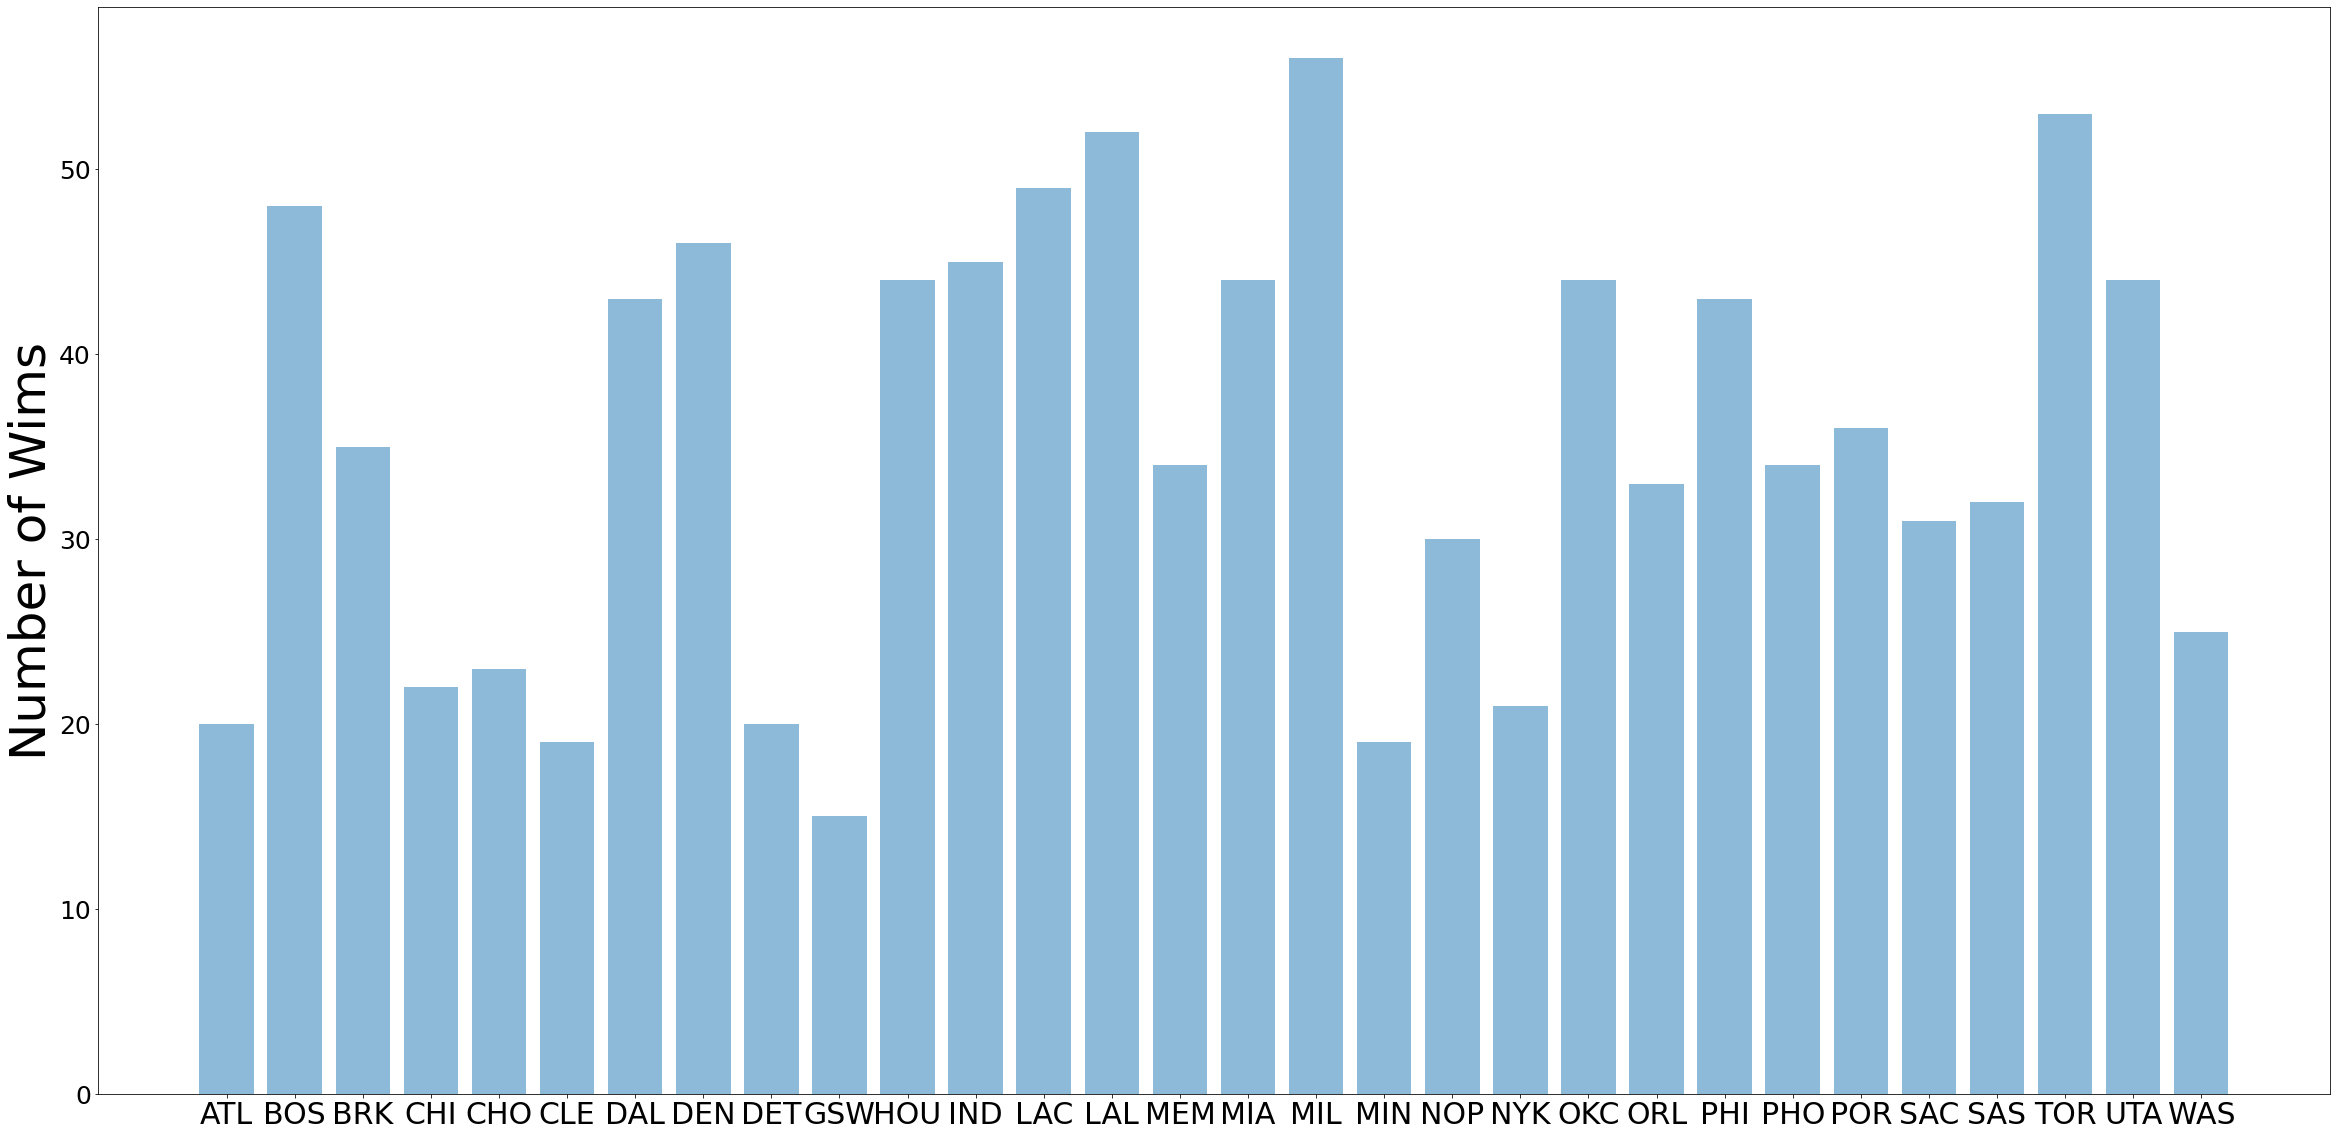

In [21]:
ret_reg = wins(data3, "regular")[0]
name = list(ret_reg.keys()); win = list(ret_reg.values());

plt.rcParams["figure.figsize"] = [40, 20];
plt.bar(range(len(ret_reg)),win, tick_label = name, alpha = 0.5, label = "Wins");
plt.xticks(fontsize =30);
plt.ylabel("Number of Wims", fontsize = 50);
plt.yticks(fontsize = 25);

**BAR CHART FOR PLAY-OFS**

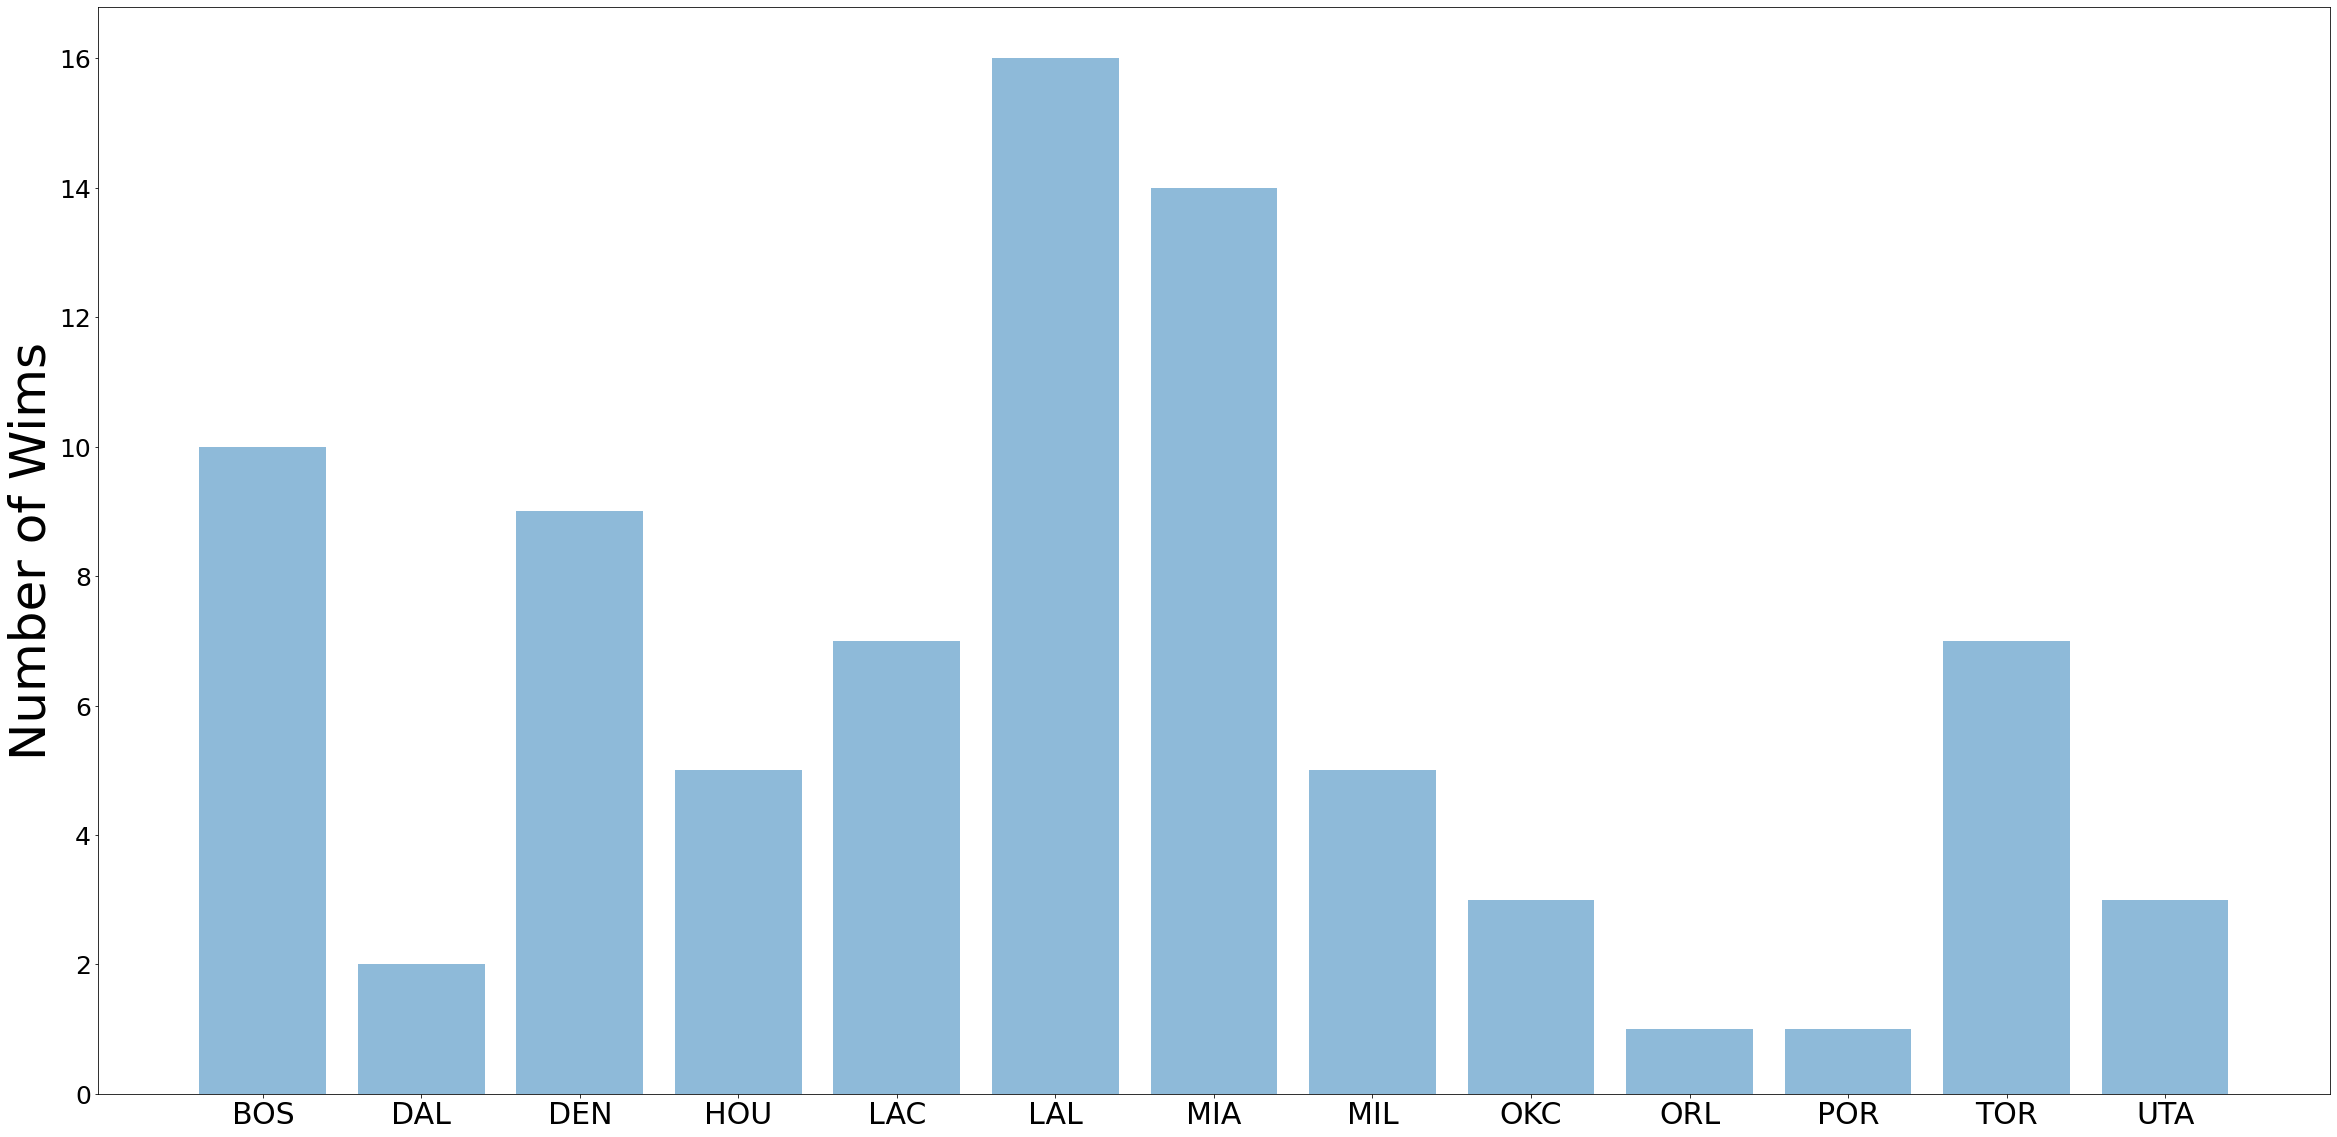

In [22]:
ret_po = wins(data3, "playoff")[0]
name = list(ret_po.keys()); win = list(ret_po.values());

plt.rcParams["figure.figsize"] = [40, 20];
plt.bar(range(len(ret_po)),win, tick_label = name, alpha = 0.5, label = "Wins");
plt.xticks(fontsize =30);
plt.ylabel("Number of Wims", fontsize = 50);
plt.yticks(fontsize = 25);